In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
df = pd.read_csv('C:\\Users\\Koushik\\OneDrive\\Desktop\\DATA\\Telco-Customer-Churn.csv')

In [256]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [258]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [260]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [262]:
df.shape

(7032, 21)

In [264]:
df.size

147672

## DATA CLEANING

In [266]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [268]:
df[df.duplicated() ==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## EDA ANALYSIS

In [271]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

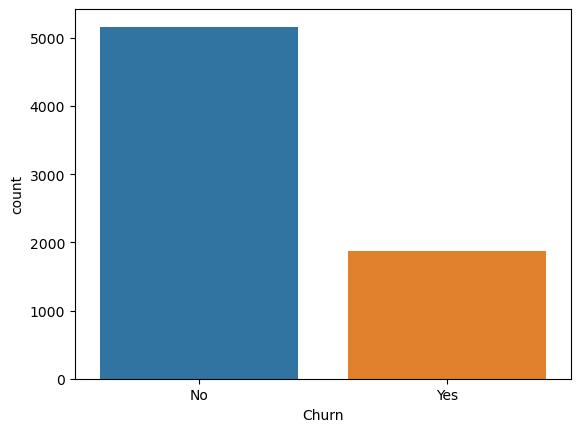

In [289]:
sns.countplot(data = df,x ='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

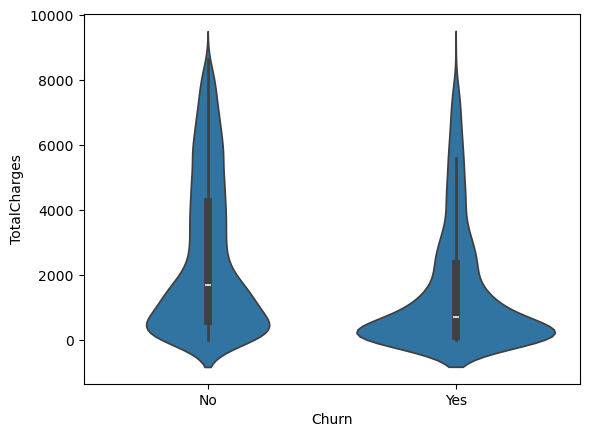

In [291]:
sns.violinplot(data = df,x = 'Churn',y ='TotalCharges')

<Axes: xlabel='gender', ylabel='count'>

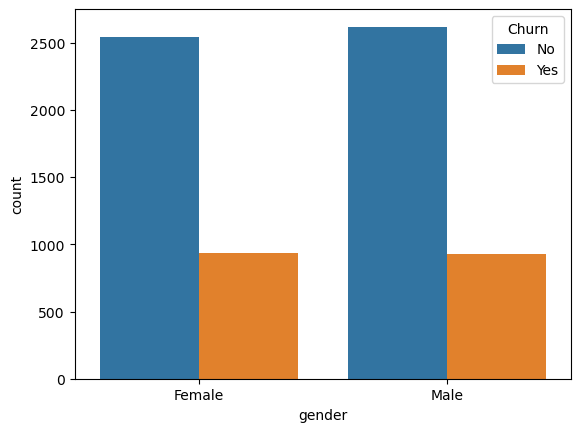

In [293]:
sns.countplot(data = df,x='gender',hue = 'Churn')

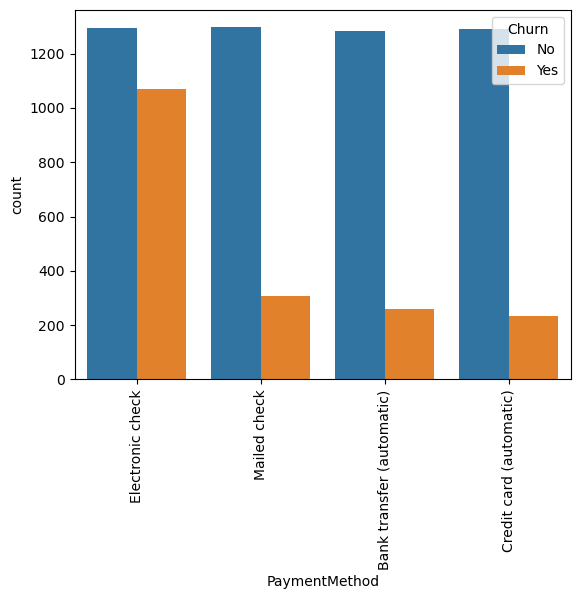

In [295]:
sns.countplot(data = df,x='PaymentMethod',hue = 'Churn')
plt.xticks(rotation=90);

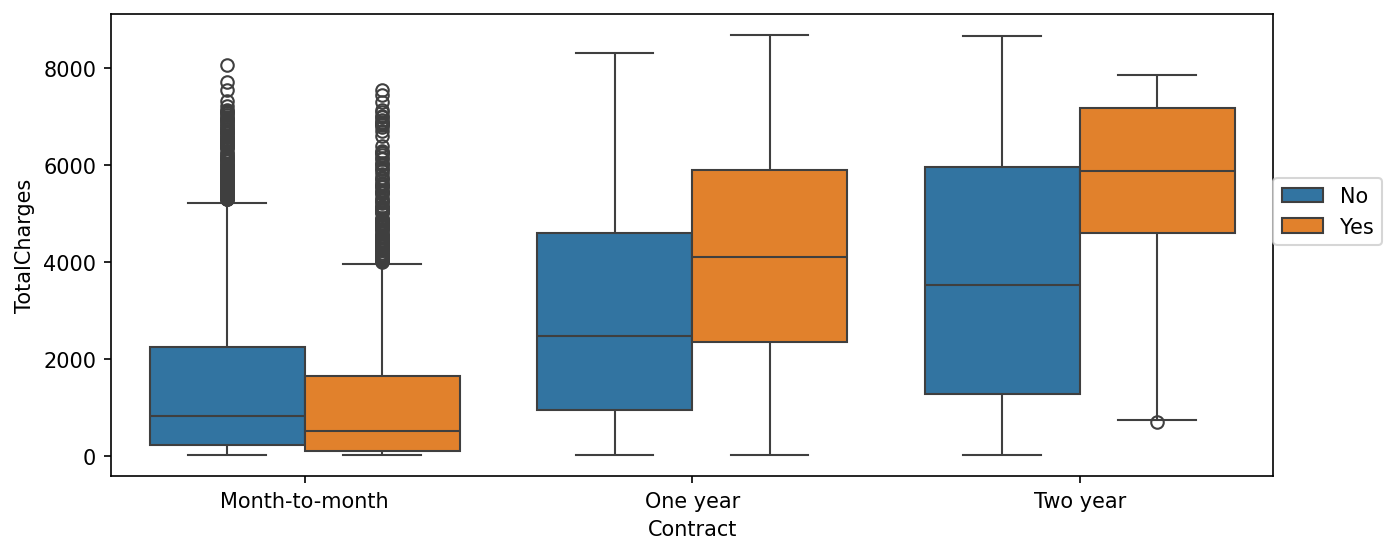

In [297]:
plt.figure(figsize=(10,4),dpi=150)
sns.boxplot(data = df,y = 'TotalCharges', x ='Contract',hue = 'Churn')
plt.legend(loc = (1.0,0.5))

In [299]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','MultipleLines', 'InternetService','PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']],dtype = 'int').corr()

In [301]:
corr_df

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.219874,0.102411,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
MonthlyCharges,0.219874,1.000000,0.651065,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,-0.338514,...,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568,-0.192858,0.192858
TotalCharges,0.102411,0.651065,1.000000,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,-0.396765,...,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708,0.199484,-0.199484
gender_Female,0.001819,0.013779,-0.000048,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-0.013779,0.000048,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.097825,-0.319072,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.097825,0.319072,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.112343,-0.064653,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.112343,0.064653,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
MultipleLines_No,-0.136377,-0.338514,-0.396765,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [303]:
corr_df['Churn_Yes']

SeniorCitizen                              0.150541
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
OnlineSecurity_No                          0.342235
OnlineSecurity_No internet service        -0.227578
OnlineSecuri

In [305]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

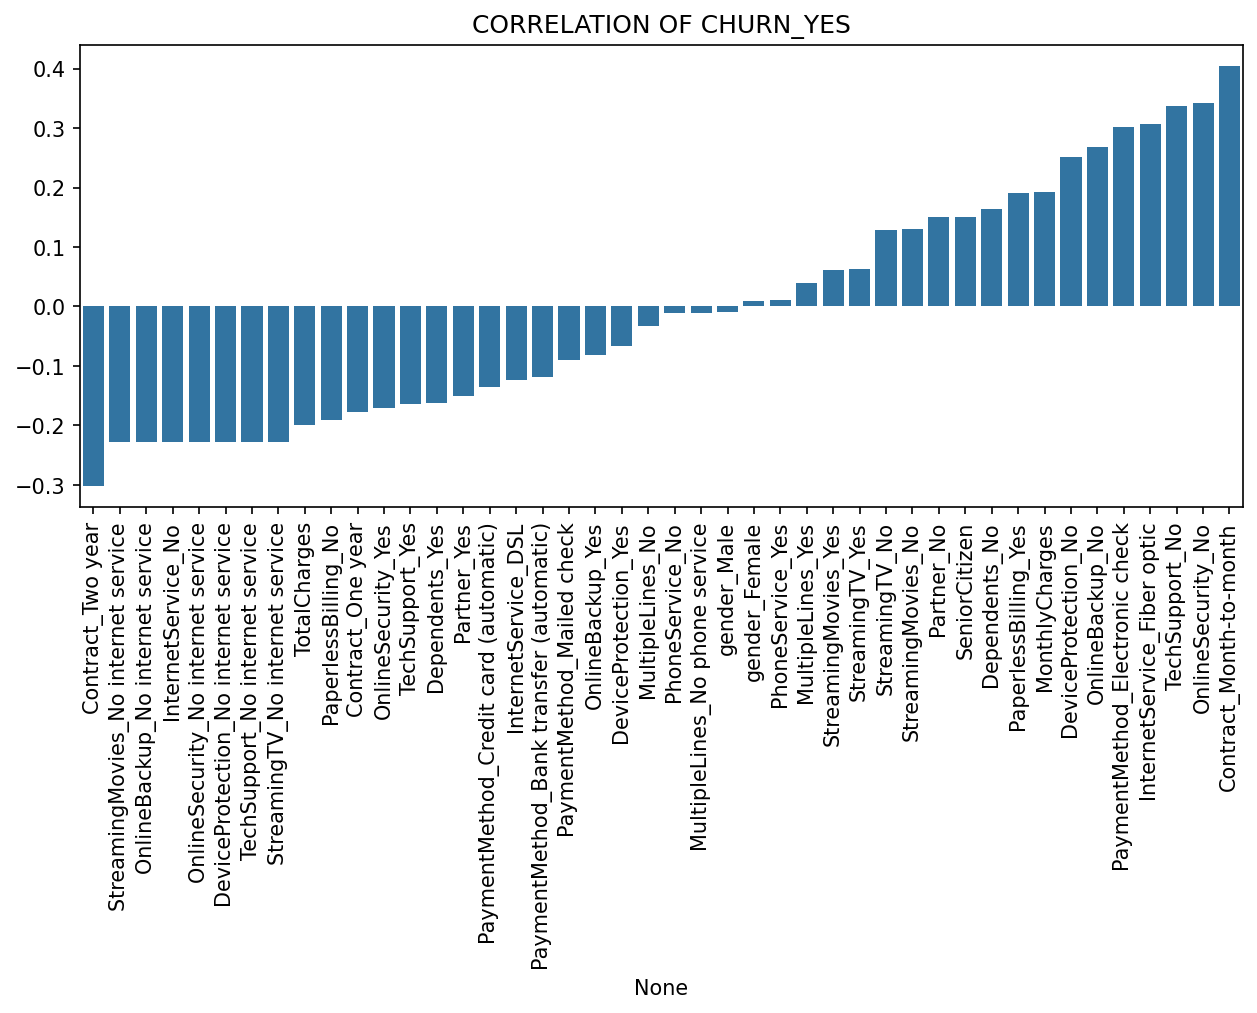

In [307]:
plt.figure(figsize=(10,4),dpi =150)
plt.title('CORRELATION OF CHURN_YES')
sns.barplot(x = corr_yes_churn.index,y = corr_yes_churn.values)
plt.xticks(rotation=90);

In [308]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

<Axes: xlabel='tenure', ylabel='Count'>

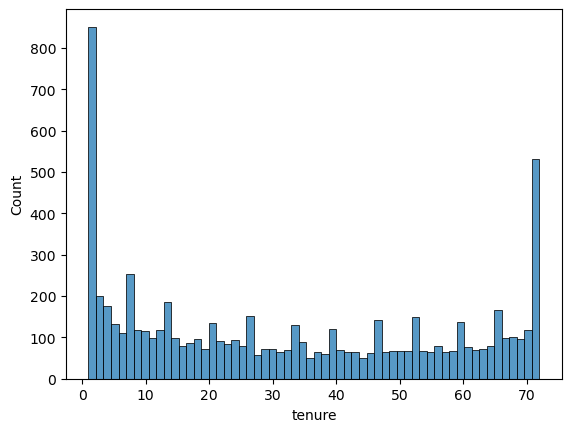

In [311]:
sns.histplot(data = df,x='tenure',bins =60)

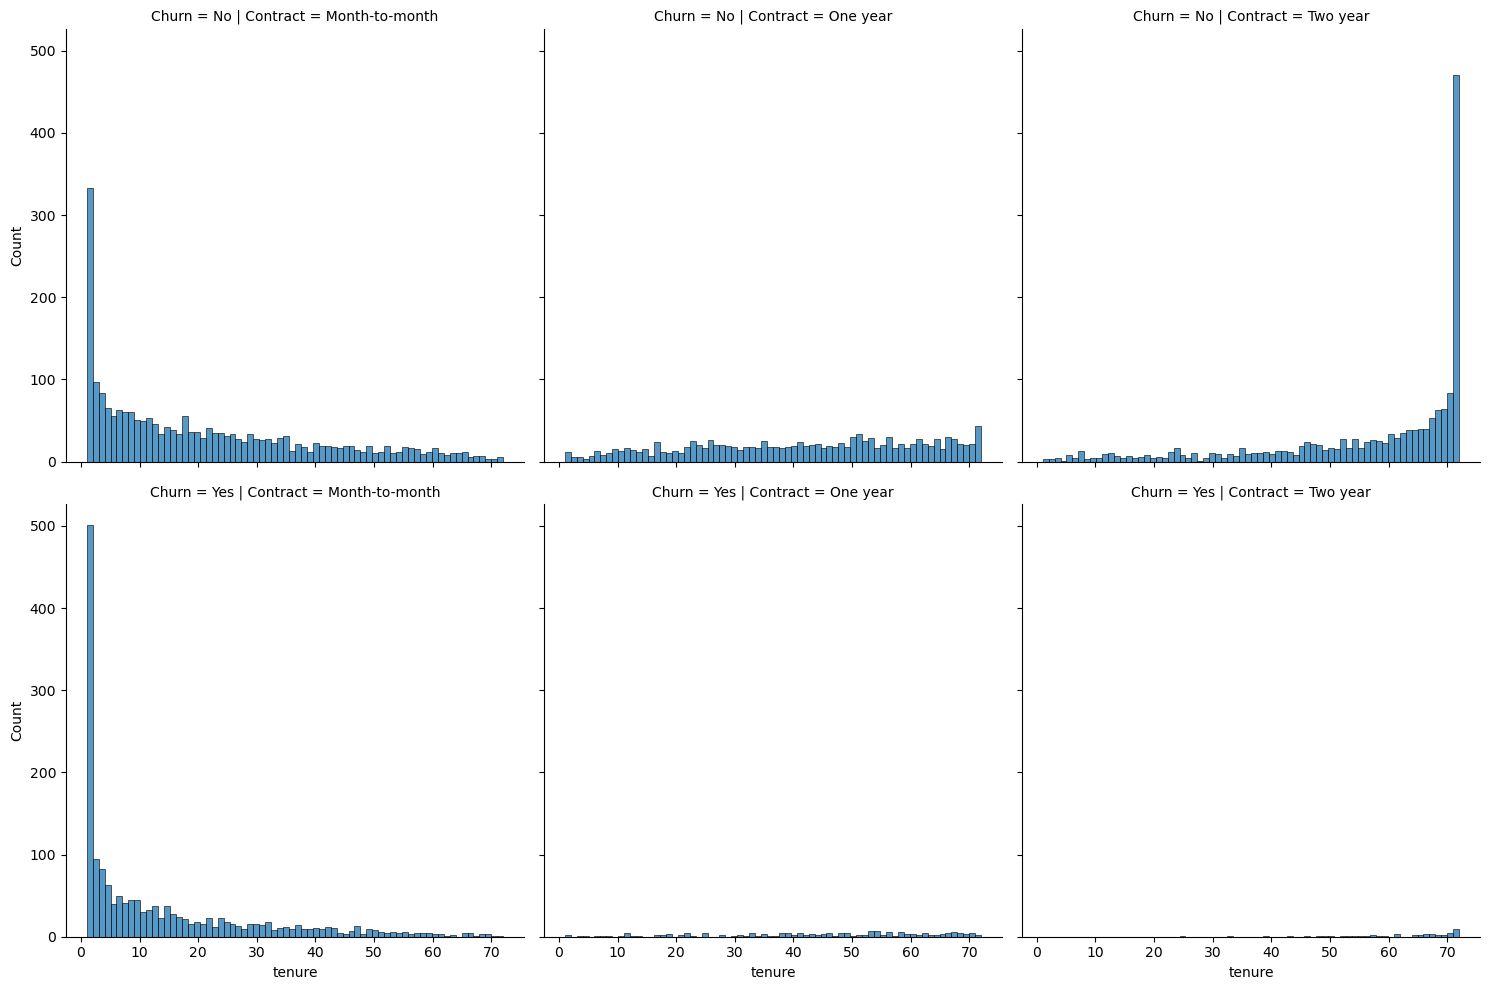

In [313]:
sns.displot(data = df,x ='tenure',bins = 70,col='Contract',row ='Churn')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

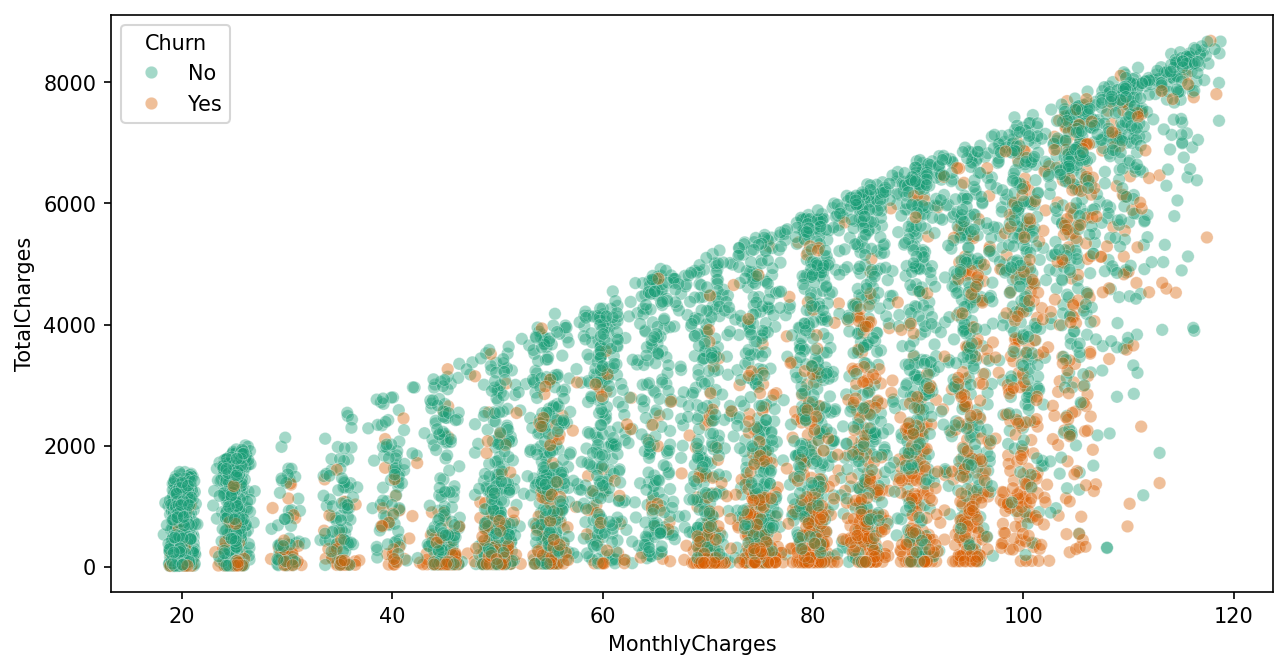

In [315]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data = df,x = 'MonthlyCharges',y ='TotalCharges',hue ='Churn',alpha=0.4,linewidth=0.3,palette ='Dark2')

In [317]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [319]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [321]:
churn_rate = yes_churn*100/(yes_churn+no_churn)

<Axes: xlabel='tenure'>

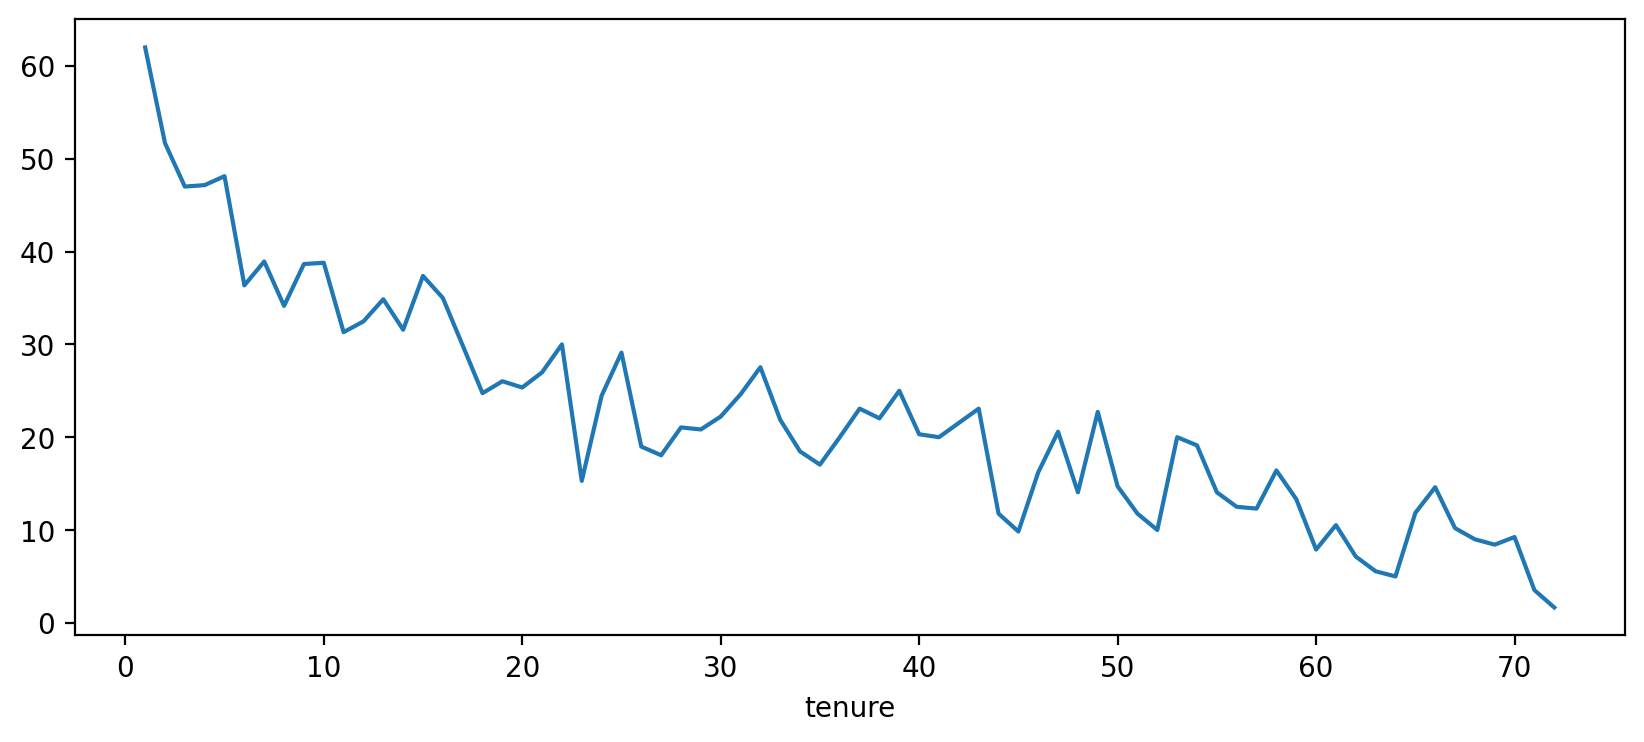

In [323]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.transpose()['customerID'].plot()

In [325]:
bins = [0,12,24,48,102]
labels = ['0-12 Months','12-24 Months','24-48 Months','Over 48 Months']
df['Tenure Cohort'] = pd.cut(df['tenure'],bins ,labels = labels)

In [327]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [329]:
df['Tenure Cohort'].value_counts()

Tenure Cohort
Over 48 Months    2239
0-12 Months       2175
24-48 Months      1594
12-24 Months      1024
Name: count, dtype: int64

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

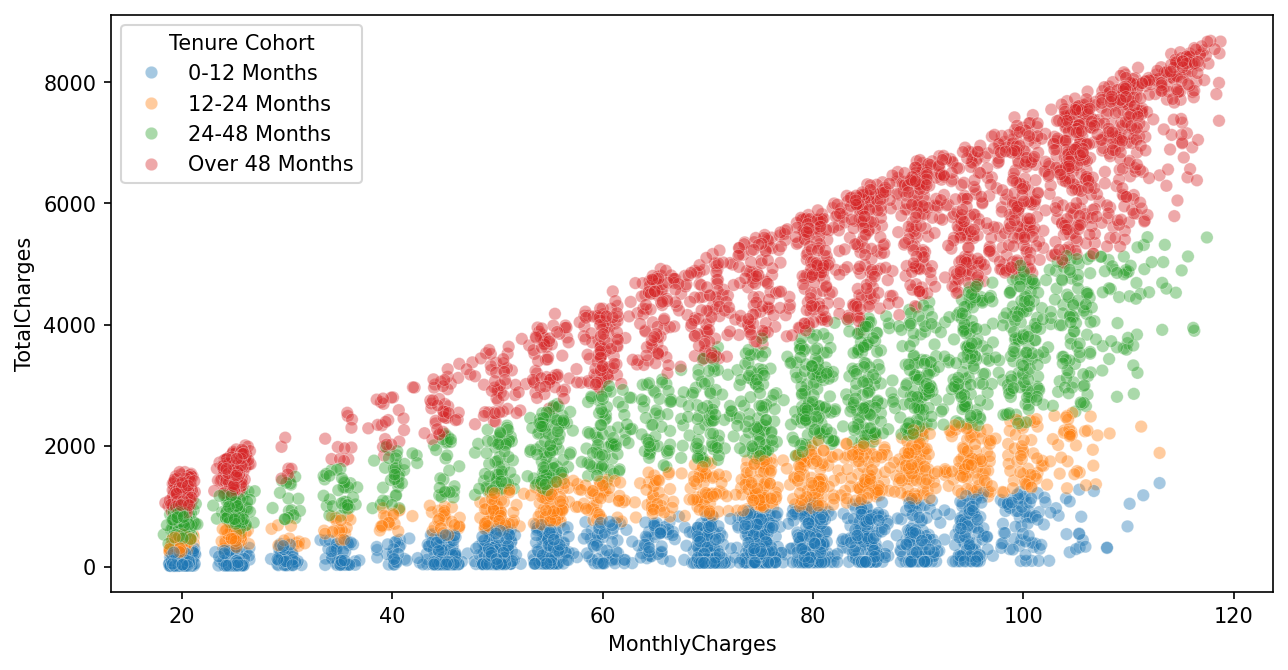

In [331]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data = df,x = 'MonthlyCharges',y ='TotalCharges',hue ='Tenure Cohort',alpha=0.4,linewidth=0.3)

<Axes: xlabel='Tenure Cohort', ylabel='count'>

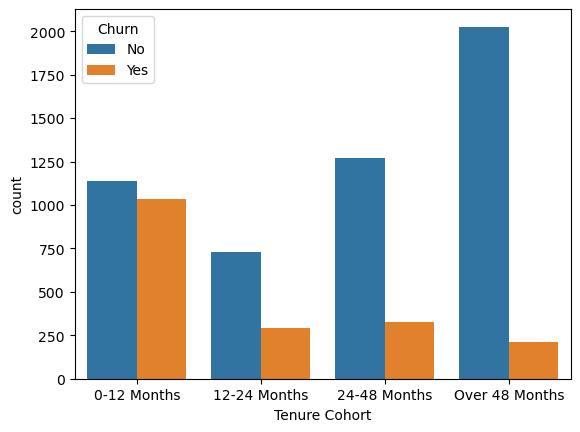

In [332]:
sns.countplot(x = 'Tenure Cohort',data = df,hue ='Churn')

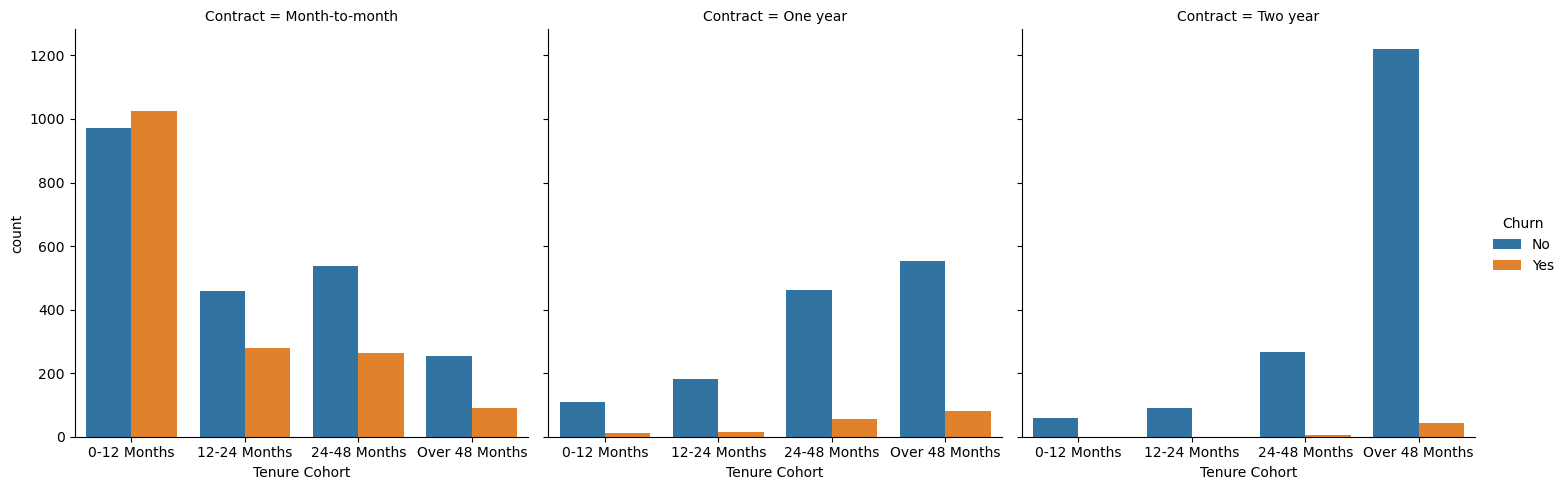

In [335]:
sns.catplot(data = df,x = 'Tenure Cohort',hue = 'Churn',kind = 'count',col = 'Contract')

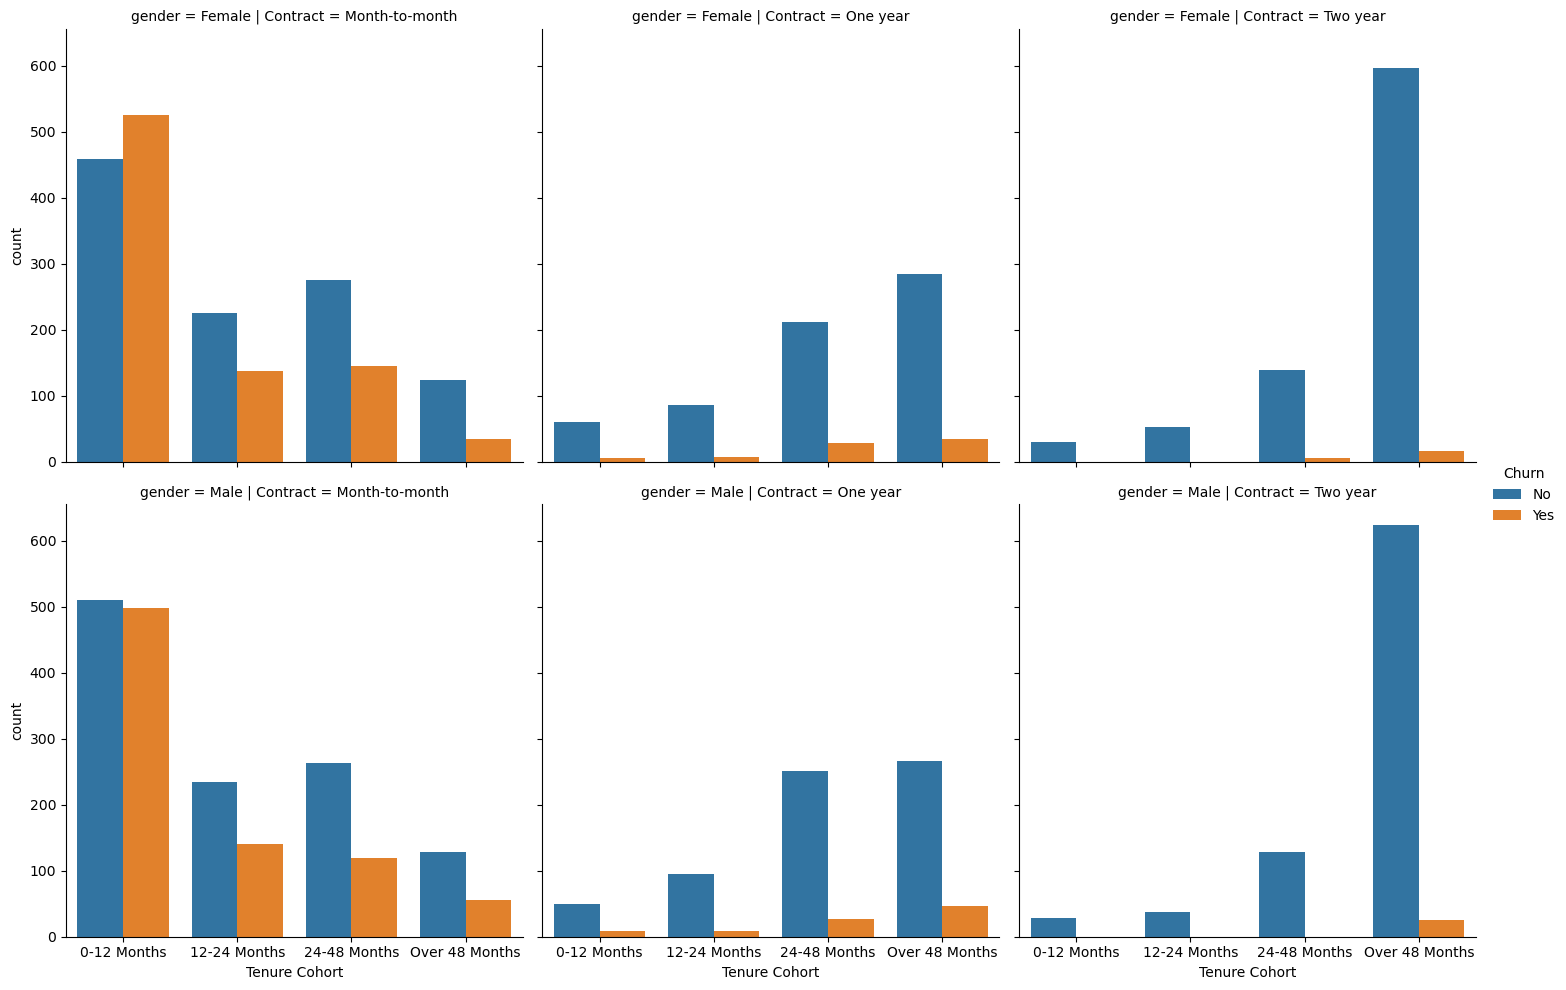

In [336]:
sns.catplot(data = df,x = 'Tenure Cohort',hue = 'Churn',kind = 'count',col = 'Contract',row ='gender')